Pekerjaan Muhammad Ulil 'Azmi

In [1]:
# Mengimpor library-library yang digunakan
import numpy as np # untuk aljabar linear
import pandas as pd # pemrosesan data, pembacaan file CSV I/O (contoh: pd.read_csv)
import matplotlib.pyplot as plt # untuk visualisasi
import datetime # untuk data atau pengolahan data berupa tanggal dan waktu

In [2]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import tensorflow as tf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Menyesuaikan path dengan lokasi dataset yang digunakan
dataset=pd.read_csv('/content/drive/MyDrive/Proa-ML/Demo/Dataset/Sample - Superstore.csv', encoding='windows-1252')

In [5]:
#Melihat informai dari dataset yang kita miliki
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
dataset.head() # Melihat bagian kepala (5 data paling atas dari dataset kita)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
dataset.Category.unique() # Melihat anggota unik dari kolom "Category"

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [8]:
dataset["Ship Mode"].unique() # Melihat anggota unik dari kolom "Ship Mode"

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [9]:
dataset["Segment"].unique() # Melihat anggota unik dari kolom "Segment"

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [10]:
dataset["Region"].unique() # Melihat anggota unik dari kolom "Region"

array(['South', 'West', 'Central', 'East'], dtype=object)

In [11]:
dataset.shape # Melihat bentuk dari dataset

(9994, 21)

In [12]:
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'], format='%m/%d/%Y') #Mengonversi tipe data dari kolom 'Order Date' atau tanggal pemesanan menjadi format tanggal.
dataset['Ship Date'] = pd.to_datetime(dataset['Ship Date'], format='%m/%d/%Y') #Mengonversi tipe data dari kolom 'Ship Date' atau tanggal pengiriman menjadi format tanggal.
dataset.info() # Melihat informasi dataset setelah konversi type data dari kolom tanggal menjadi bertipe format tanggal.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [13]:
dataset['Order Date'].min(), dataset['Order Date'].max() # Melihat jangka waktu dari dataset yang dimiliki

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [15]:
dataset_profit = dataset

In [16]:
dataset_profit = dataset_profit[['Order Date','Profit']]

In [17]:
dataset_profit.head()


,Order Date,Profit
0,2016-11-08,41.9136
1,2016-11-08,219.5820
2,2016-06-12,6.8714
3,2015-10-11,-383.0310
4,2015-10-11,2.5164


In [18]:
dataset_profit = dataset_profit.sort_values('Order Date')
dataset_profit = dataset_profit.groupby('Order Date')['Profit'].sum().reset_index()
dataset_profit.head()


,Order Date,Profit
0,2014-01-03,5.5512
1,2014-01-04,-65.9901
2,2014-01-05,4.8840
3,2014-01-06,1358.0524
4,2014-01-07,-71.9621


In [19]:
dataset_profit = dataset_profit.set_index('Order Date')
dataset_profit.head()


,Profit
Order Date,
2014-01-03,5.5512
2014-01-04,-65.9901
2014-01-05,4.8840
2014-01-06,1358.0524
2014-01-07,-71.9621


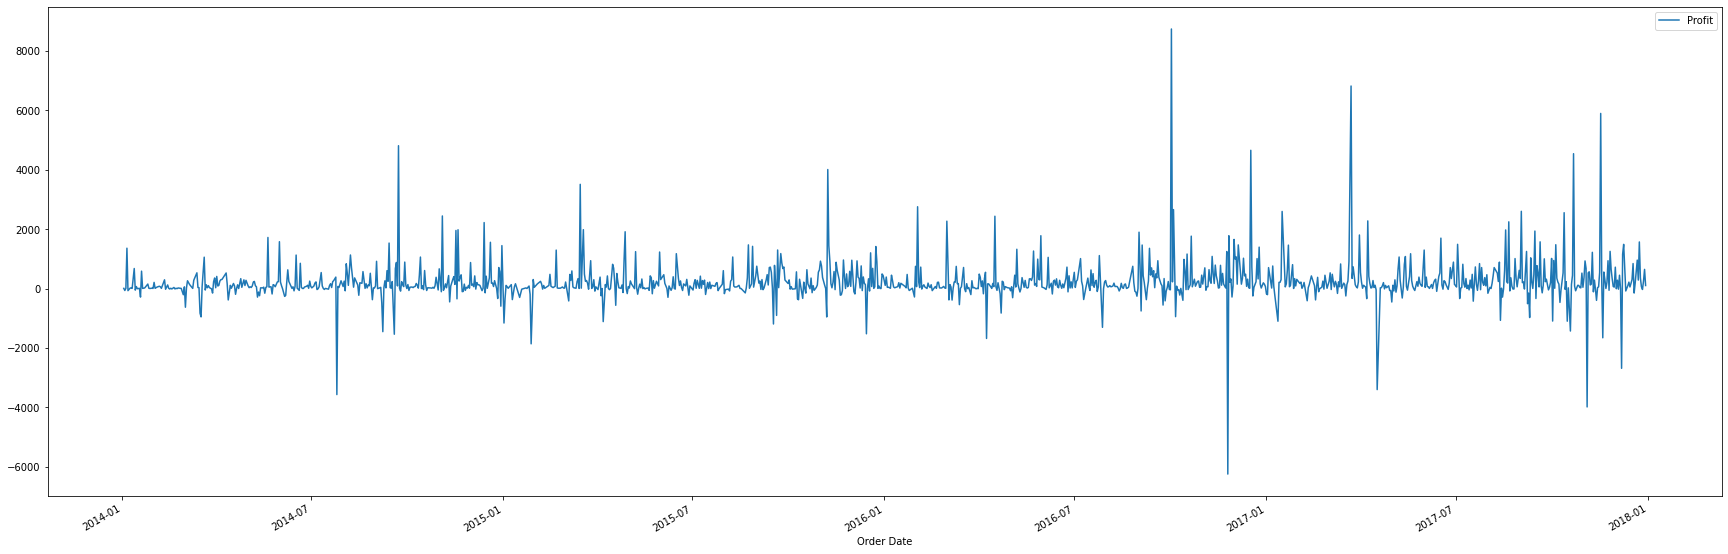

In [20]:
dataset_profit.plot(figsize=(30, 10));

In [21]:
dataset_profit =  pd.DataFrame(dataset_profit['Profit'].resample('D').mean()) #Data diresample dengan aturan D alias hari
dataset_profit = dataset_profit.interpolate(method='linear') #Fungsi interpolate() digunakan untuk melakukan interpolasi secara linear.

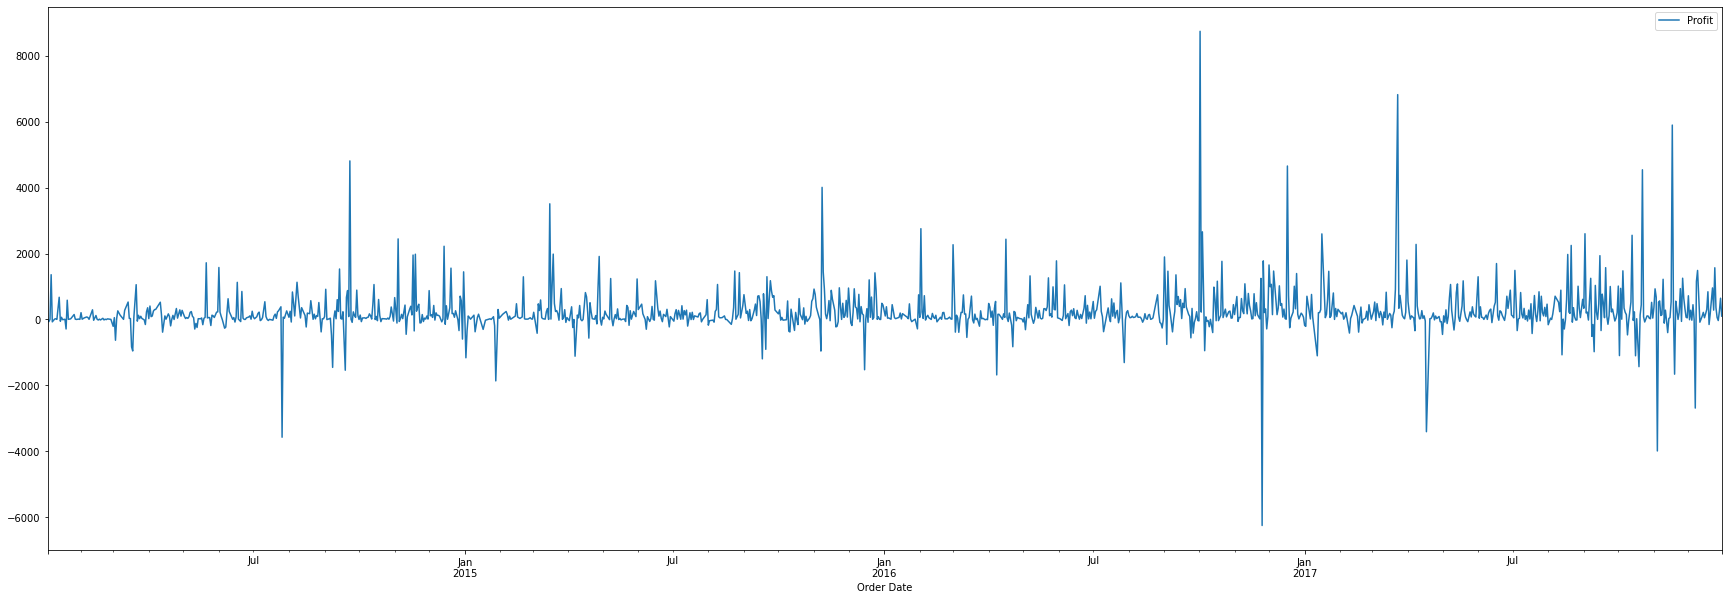

In [22]:
dataset_profit.plot(figsize=(30, 10));

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


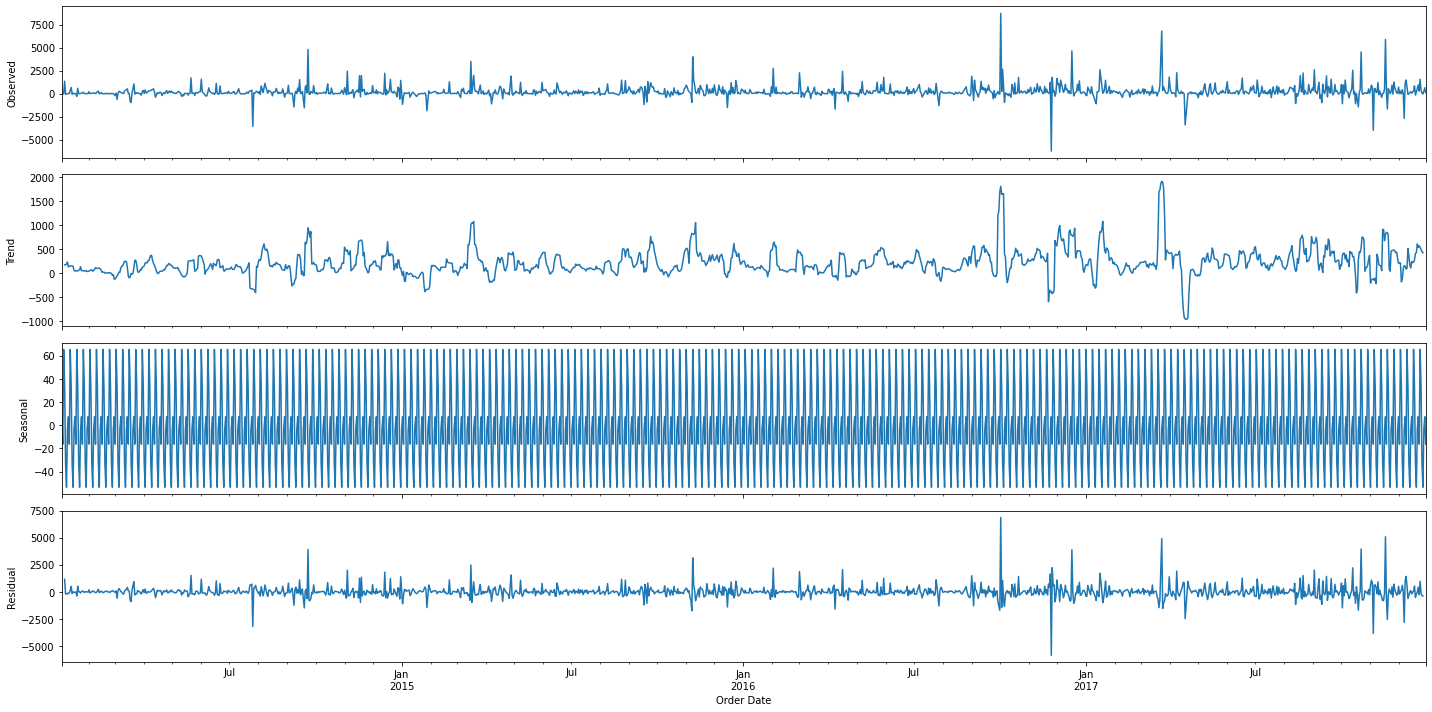

In [23]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(dataset_profit, model='additive') # Mengurai data deret waktu menjadi Tren dan Seasonalitas
fig = decomposition.plot()
plt.show();

In [24]:
order_dates = dataset_profit.index.values
profit  = dataset_profit['Profit'].values

In [25]:
profit.shape

(1458,)

In [26]:
profit_train = profit[:int(len(profit)*0.8)]
profit_valid = profit[int(len(profit)*0.8):]

In [27]:
callback_es = tf.keras.callbacks.EarlyStopping(
    monitor='mae',
    min_delta=0,
    patience=5,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)


In [28]:
# Memotong atau menjendela dataset
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)


In [29]:
# Membuat set pelatihan dan validasi
train_set = windowed_dataset(profit_train, window_size=60, batch_size=100, shuffle_buffer=1000)
valid_set = windowed_dataset(profit_valid, window_size=60, batch_size=100, shuffle_buffer=1000)

In [30]:
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dropout(0.6),
  tf.keras.layers.LSTM(64),          
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [31]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [32]:
history = model.fit(train_set,epochs=100, validation_data = valid_set, callbacks=callback_es)

Epoch 1/100
12/12 [==============================] - 17s 511ms/step - loss: 311.1395 - mae: 311.6378 - val_loss: 475.3310 - val_mae: 475.8308
Epoch 2/100
12/12 [==============================] - 2s 149ms/step - loss: 311.0997 - mae: 311.5982 - val_loss: 475.2093 - val_mae: 475.7089
Epoch 3/100
12/12 [==============================] - 2s 145ms/step - loss: 311.0271 - mae: 311.5248 - val_loss: 475.1382 - val_mae: 475.6375
Epoch 4/100
12/12 [==============================] - 2s 140ms/step - loss: 310.9825 - mae: 311.4803 - val_loss: 475.0950 - val_mae: 475.5941
Epoch 5/100
12/12 [==============================] - 2s 139ms/step - loss: 310.9525 - mae: 311.4503 - val_loss: 475.0611 - val_mae: 475.5600
Epoch 6/100
12/12 [==============================] - 2s 138ms/step - loss: 310.9179 - mae: 311.4156 - val_loss: 475.0275 - val_mae: 475.5262
Epoch 7/100
12/12 [==============================] - 2s 134ms/step - loss: 310.8911 - mae: 311.3889 - val_loss: 475.0010 - val_mae: 475.4996
Epoch 8/100


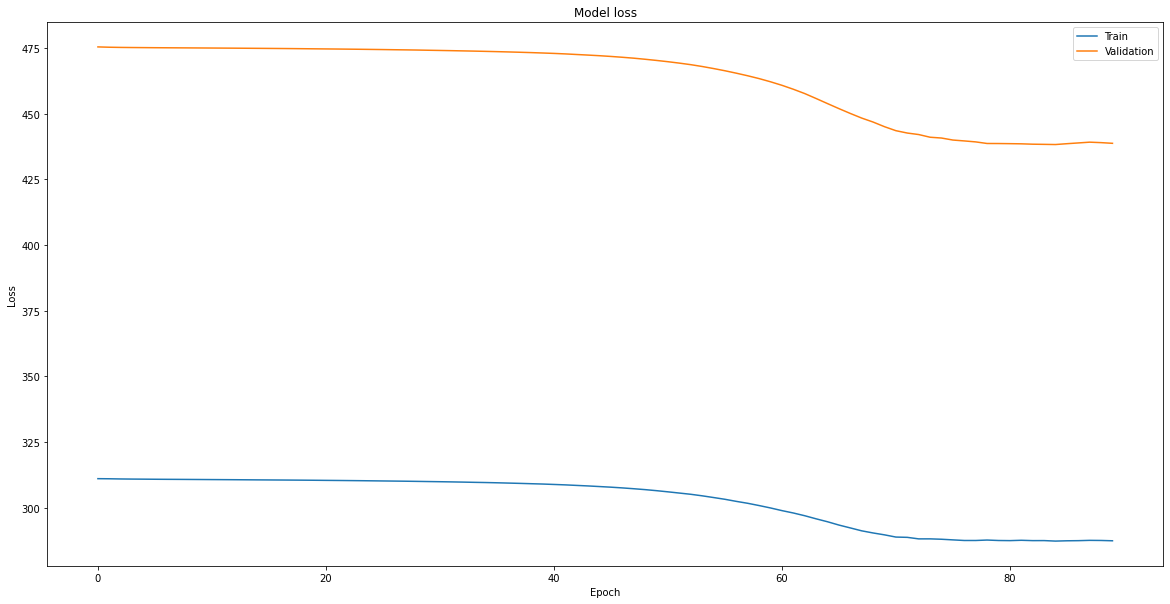

In [33]:
#Membuat plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

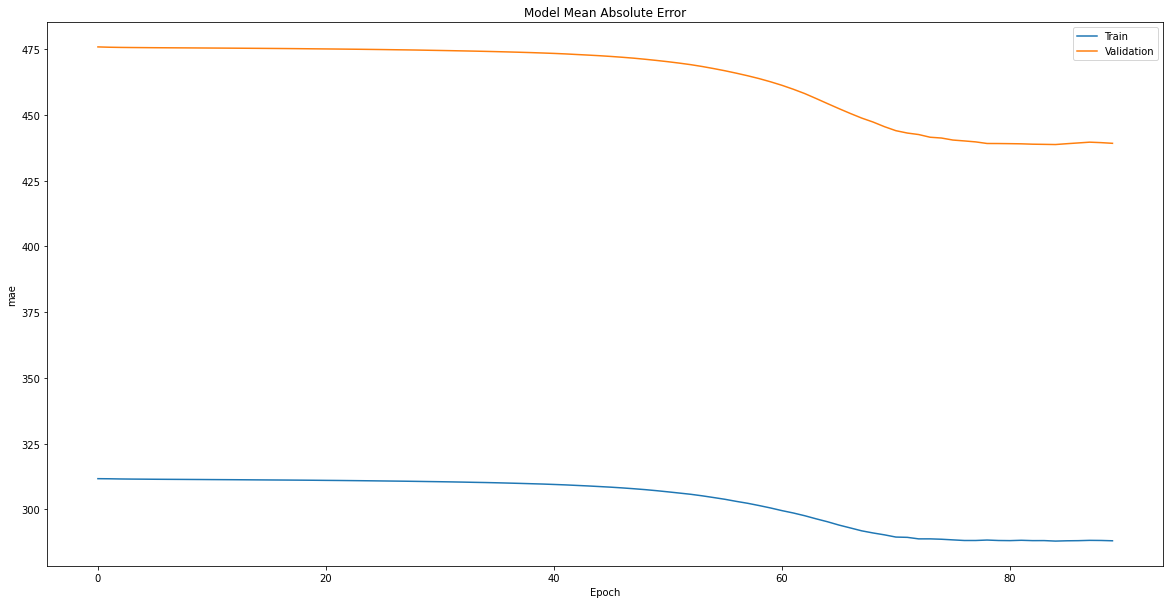

In [34]:
#Membuat plot MAE
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Mean Absolute Error')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [35]:
#Menggunakan Seasonal Arima (SARIMA) untuk melakukan forecasting

In [36]:
import itertools
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
pdq_musiman = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

for parameters in pdq: # looping untuk mengetahui kombinasi parameter musiman untuk SARIMA
    for parameter_musiman in pdq_musiman:
        try:
            mod = sm.tsa.statespace.SARIMAX(dataset_profit,
                                            order=parameters,
                                            seasonal_param_order=parameter_musiman,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False) #mengetahui nilai AIC dari model**
            results = mod.fit()
            print('SARIMA{}x{}12 - AIC:{}'.format(parameters, parameter_musiman, results.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:23238.38452213444
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:23238.38452213444
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:23238.38452213444
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:23238.38452213444
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:23238.38452213444
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:23238.38452213444
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:23238.38452213444
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:23238.38452213444
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:23189.568058980632
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:23189.568058980632
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:23189.568058980632
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:23189.568058980632
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:23189.568058980632
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:23189.568058980632
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:23189.568058980632
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:23189.568058980632
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:23958.91639448193
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:23

In [37]:
# Diambil SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:26446.073210719085

In [38]:
model_sarima = sm.tsa.statespace.SARIMAX(dataset_profit,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
hasil = model_sarima.fit() #model fitting
print(hasil.summary().tables[1]) # menampilkan hasil model SARIMA

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0758      0.015      5.189      0.000       0.047       0.104
ma.L1         -1.0000      0.008   -120.513      0.000      -1.016      -0.984
ar.S.L12       0.0105      0.030      0.347      0.729      -0.049       0.070
ma.S.L12      -0.9829      0.011    -85.966      0.000      -1.005      -0.961
sigma2      4.475e+05   1.86e-08   2.41e+13      0.000    4.48e+05    4.48e+05


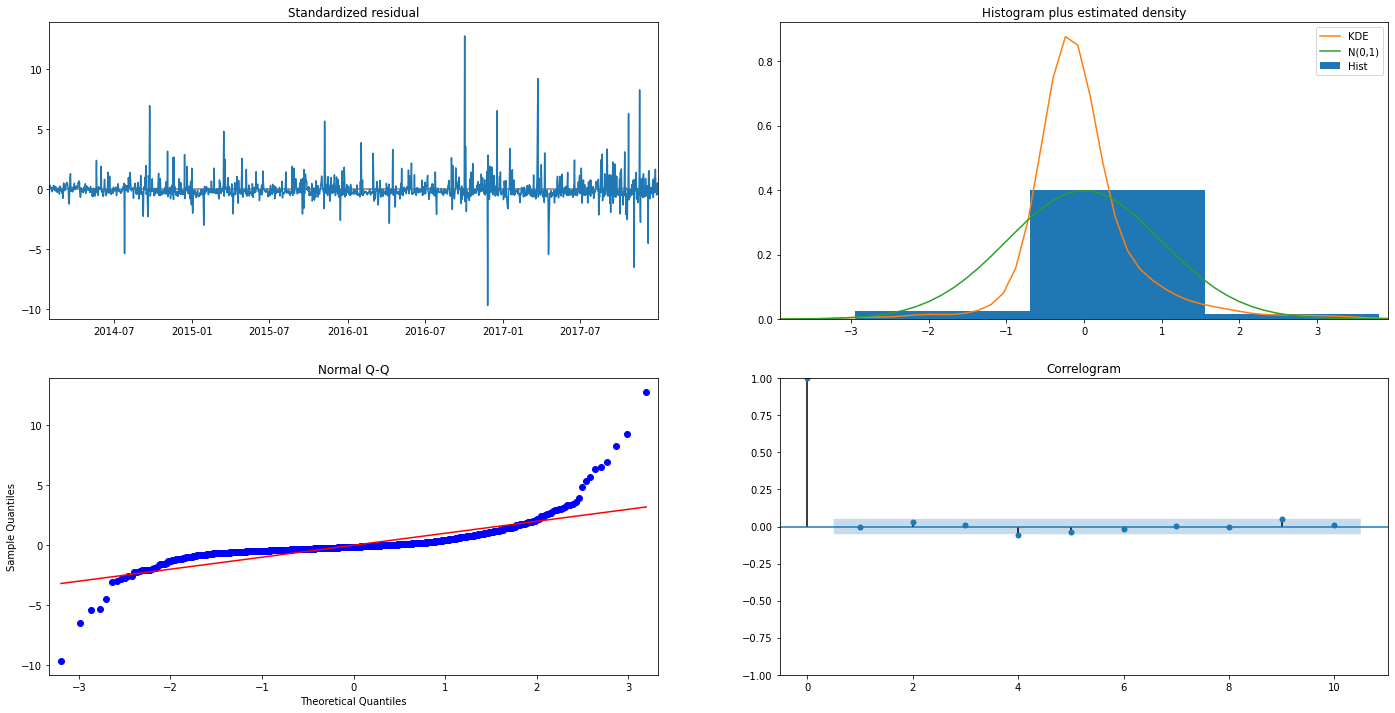

In [39]:
hasil.plot_diagnostics(figsize=(24, 12)) 
#Menghasilkan beberapa grafik: 
# 1. Residual terstandar dalam satuan waktu
# 2. Histogram dan perkiraan kepadatan dari residual terstandar/
# 3. Normal Q-Q, dengan garis referensi normal.
# 4. Korellogram
plt.show()

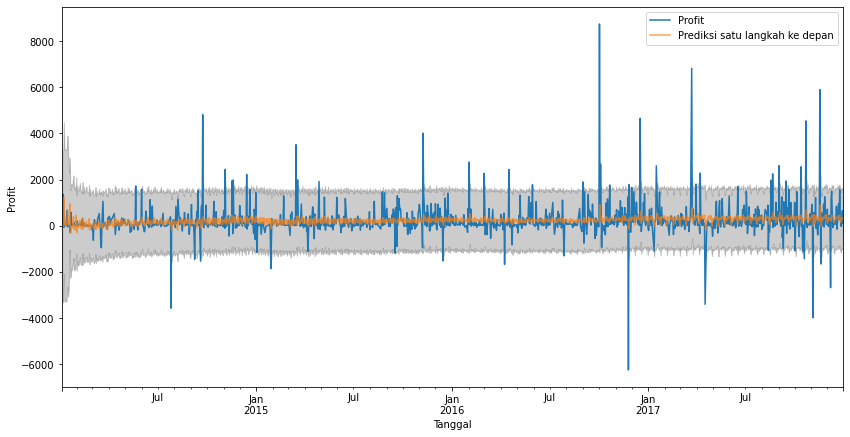

In [40]:
pred = hasil.get_prediction(start=dataset_profit.index[1], dynamic=False) # variabel untuk menunjukkan plot
pred_confidence = pred.conf_int()
ax = dataset_profit['2014':].plot(label='observed') # menunjukkan plot nilai original
pred.predicted_mean.plot(ax=ax, label='Prediksi satu langkah ke depan', alpha=.7, figsize=(14, 7)) # menunjukkan plot untuk nilai prediksi
ax.fill_between(pred_confidence.index,
                pred_confidence.iloc[:, 0],
                pred_confidence.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Tanggal')
ax.set_ylabel('Profit')
plt.legend()
plt.show()


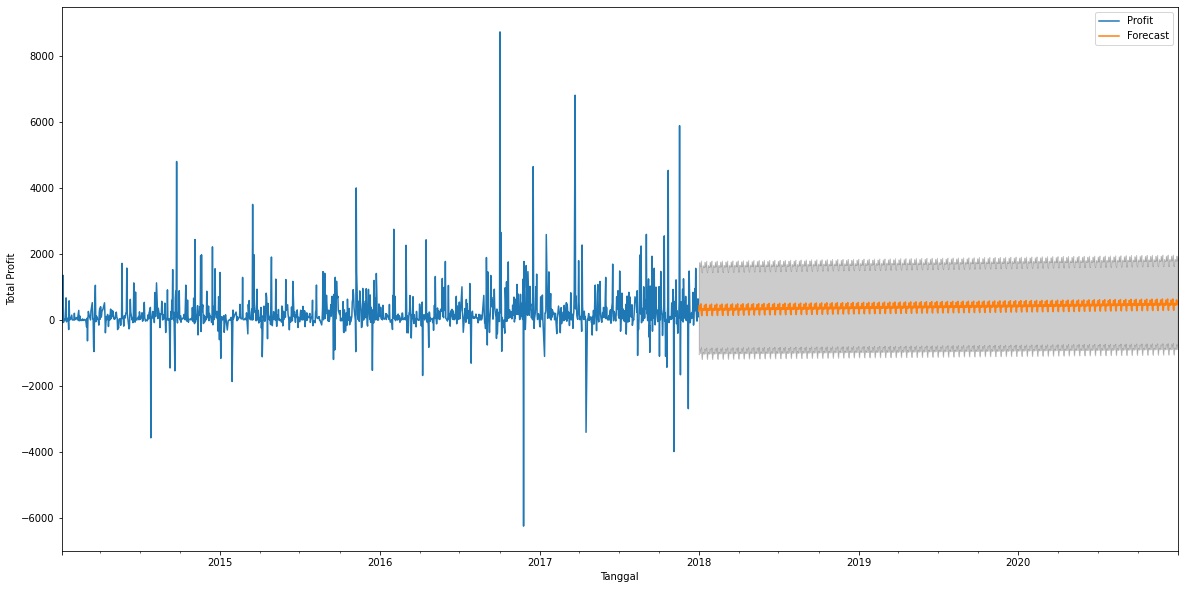

In [41]:
forecaset = hasil.get_forecast(steps = pd.to_datetime('2020-12-31'))
forecast_confidence = forecaset.conf_int()

ax = dataset_profit['2014':].plot(label='observed') # menunjukkan plot nilai original
forecaset.predicted_mean.plot(ax = ax, label ='Forecast')
ax.fill_between(forecast_confidence.index,
               forecast_confidence.iloc[:,0],
               forecast_confidence.iloc[:,1],
               color = 'k',
               alpha = .2)

ax.set_xlabel('Tanggal')
ax.set_ylabel('Total Profit')
plt.legend()
plt.show()


In [42]:
y_forecasted = pred.predicted_mean
y_truth = dataset_profit['Profit']

from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_forecasted, y_truth[1:])
rmse = sqrt(mse)
print('MSE dari hasil peramalan adalah {}'.format(round(rmse, 2))) # displays the root mean squared error of the forecast with rounding it up to 2 decimals

MSE dari hasil peramalan adalah 669.8
